In [39]:
import pandas as pd
import numpy as np

# Workflow Description

In [40]:
# Load the data files
file_path_female = 'data/remaining-life-expectancy-at-different-ages-females.csv'
file_path_male = 'data/remaining-life-expectancy-at-different-ages-males.csv'

female_data = pd.read_csv(file_path_female)
male_data = pd.read_csv(file_path_male)

#### Create basic df structure with clear target variable of remaining-life-expectancy-at-different-ages-females and males

In [41]:
# Extracting age columns and reshaping the female data
female_reshaped = female_data.melt(id_vars=['Entity', 'Year', 'Code'],
                                   var_name='Age', value_name='Remaining Life Expectancy')
female_reshaped['Sex'] = 'Female'

# Extracting age columns and reshaping the male data, including 'Code'
male_reshaped = male_data.melt(id_vars=['Entity', 'Year', 'Code'],
                               var_name='Age', value_name='Remaining Life Expectancy')
male_reshaped['Sex'] = 'Male'

# Concatenate the reshaped dataframes with 'Code'
combined_data = pd.concat([female_reshaped, male_reshaped])

# Extract the age from the 'Age' column
combined_data['Age'] = combined_data['Age'].str.extract(r'Age: (\d+)').astype(int)

# Reordering columns for clarity
combined_data = combined_data[['Entity', 'Code', 'Year', 'Sex', 'Age', 'Remaining Life Expectancy']]

combined_data.head()

Entity Code  Year     Sex  Age  Remaining Life Expectancy
0  Afghanistan  AFG  1950  Female    0                    28.3905
1  Afghanistan  AFG  1951  Female    0                    28.6345
2  Afghanistan  AFG  1952  Female    0                    29.1260
3  Afghanistan  AFG  1953  Female    0                    29.6212
4  Afghanistan  AFG  1954  Female    0                    29.9004

Based on an analysis of the available datasets, we have decided to limit the data range to the years 2000 to 2020. This will help us manage the amount of missing data (NaN) more effectively.

In [42]:
# Filtering the data for years between 2000 and 2020, removing rows without a 'Code' variable, and excluding the 'World'
filtered_data = combined_data.dropna(subset=['Code'])
filtered_data = filtered_data[(filtered_data['Year'] >= 2000) & (filtered_data['Year'] <= 2020) & (filtered_data['Entity'] != 'World')]

filtered_data.to_csv('filtered_data-2000_2020.csv', index=False)
filtered_data.head()


Entity Code  Year     Sex  Age  Remaining Life Expectancy
50  Afghanistan  AFG  2000  Female    0                    56.8579
51  Afghanistan  AFG  2001  Female    0                    57.3437
52  Afghanistan  AFG  2002  Female    0                    57.6715
53  Afghanistan  AFG  2003  Female    0                    58.6498
54  Afghanistan  AFG  2004  Female    0                    59.2159

#### Adding more data

In [43]:
# Load the additional data files
file_path_education_expenditure = 'data/total-government-expenditure-on-education-gdp.csv'
file_path_internet_usage = 'data/share-of-individuals-using-the-internet.csv'
file_path_electricity_access = 'data/share-of-the-population-with-access-to-electricity.csv'
file_path_sanitation = 'data/share-using-safely-managed-sanitation.csv'
file_path_smoking = 'data/share-of-adults-who-smoke.csv'
file_path_gdp = 'data/gdp.csv'
file_path_meat_supply = 'data/meat-supply-per-person.csv'
file_path_obesity = 'data/obesity.csv'
file_path_healthcare_spending = 'data/public-healthcare-spending-share-gdp.csv'
file_path_air_pollution = 'data/pm25-air-pollution.csv'
file_path_democracy_index = 'data/DemocracyIndex.csv'

# Reading the data files into DataFrames
education_expenditure_data = pd.read_csv(file_path_education_expenditure)
internet_usage_data = pd.read_csv(file_path_internet_usage)
electricity_access_data = pd.read_csv(file_path_electricity_access)
sanitation_data = pd.read_csv(file_path_sanitation)
smoking_data = pd.read_csv(file_path_smoking)
gdp_data = pd.read_csv(file_path_gdp)
meat_supply_data = pd.read_csv(file_path_meat_supply)
obesity_data = pd.read_csv(file_path_obesity)
healthcare_spending_data = pd.read_csv(file_path_healthcare_spending)
air_pollution_data = pd.read_csv(file_path_air_pollution)

# Reading and selecting specific columns from the Democracy Index file
democracy_index_data = pd.read_csv(file_path_democracy_index)[['Entity', 'Code', 'Year', 'Electoral democracy index']]

# Joining all these dataframes with the filtered_data dataframe based on 'Entity' and 'Year'
# Only join when the year exists in the filtered_data
# Adding custom suffixes to handle duplicate column names
merged_data = filtered_data
for df in [education_expenditure_data, internet_usage_data, electricity_access_data, 
           sanitation_data, smoking_data, gdp_data, meat_supply_data, 
           obesity_data, healthcare_spending_data, air_pollution_data, democracy_index_data]:
    merged_data = merged_data.merge(df, on=['Entity', 'Year'], how='left', suffixes=('', '_extra'))

# Dropping extra columns created due to overlapping column names (if any)
columns_to_drop = [col for col in merged_data.columns if '_extra' in col]
merged_data.drop(columns=columns_to_drop, inplace=True)

merged_data.sample(10)

merged_data.to_csv('merged_data.csv', index=False)



##### checking if data is correctly merged

In [44]:
# Filter the DataFrame for Switzerland and the year 2010
switzerland_data_2010 = merged_data[(merged_data['Entity'] == 'Switzerland') & (merged_data['Year'] == 2010)]

switzerland_data_2010

Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
4315   Switzerland  CHE  2010  Female    0                    84.3602   
9271   Switzerland  CHE  2010  Female   10                    74.7753   
14227  Switzerland  CHE  2010  Female   15                    69.8006   
19183  Switzerland  CHE  2010  Female   25                    59.9133   
24139  Switzerland  CHE  2010  Female   45                    40.3310   
29095  Switzerland  CHE  2010  Female   65                    21.9793   
34051  Switzerland  CHE  2010  Female   80                     9.9016   
39007  Switzerland  CHE  2010    Male    0                    80.0230   
43963  Switzerland  CHE  2010    Male   10                    70.3838   
48919  Switzerland  CHE  2010    Male   15                    65.4156   
53875  Switzerland  CHE  2010    Male   25                    55.6517   
58831  Switzerland  CHE  2010    Male   45                    36.3337   
63787  Switzerland  CHE  2010    Male   65                    18.7386   
68743  Switzerland  CHE  2010    Male   80                     8.1907   

       Gov expenditure on education (%)  Internet usage (% of population)  \
4315                             4.8021                              83.9   
9271                             4.8021                              83.9   
14227                            4.8021                              83.9   
19183                            4.8021                              83.9   
24139                            4.8021                              83.9   
29095                            4.8021                              83.9   
34051                            4.8021                              83.9   
39007                            4.8021                              83.9   
43963                            4.8021                              83.9   
48919                            4.8021                              83.9   
53875                            4.8021                              83.9   
58831                            4.8021                              83.9   
63787                            4.8021                              83.9   
68743                            4.8021                              83.9   

       Access to electricity (% of population)  SanitationAccess  \
4315                                     100.0             98.71   
9271                                     100.0             98.71   
14227                                    100.0             98.71   
19183                                    100.0             98.71   
24139                                    100.0             98.71   
29095                                    100.0             98.71   
34051                                    100.0             98.71   
39007                                    100.0             98.71   
43963                                    100.0             98.71   
48919                                    100.0             98.71   
53875                                    100.0             98.71   
58831                                    100.0             98.71   
63787                                    100.0             98.71   
68743                                    100.0             98.71   

       SmokingRateAdults       GDP ($)  \
4315                26.9  5.174870e+11   
9271                26.9  5.174870e+11   
14227               26.9  5.174870e+11   
19183               26.9  5.174870e+11   
24139               26.9  5.174870e+11   
29095               26.9  5.174870e+11   
34051               26.9  5.174870e+11   
39007               26.9  5.174870e+11   
43963               26.9  5.174870e+11   
48919               26.9  5.174870e+11   
53875               26.9  5.174870e+11   
58831               26.9  5.174870e+11   
63787               26.9  5.174870e+11   
68743               26.9  5.174870e+11   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
4315                          

In [45]:
print("Basic Information:")
print(merged_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69384 entries, 0 to 69383
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       69384 non-null  object 
 1   Code                                                         69384 non-null  object 
 2   Year                                                         69384 non-null  int64  
 3   Sex                                                          69384 non-null  object 
 4   Age                                                          69384 non-null  int32  
 5   Remaining Life Expectancy                                    69384 non-null  float64
 6   Gov expenditure on education (%)                             42014 non-null  float64
 7   Internet usage (% of population)                         

In [46]:
print("\nDescriptive Statistics for Numerical Columns:")
print(merged_data.describe())


Descriptive Statistics for Numerical Columns:
               Year           Age  Remaining Life Expectancy  \
count  69384.000000  69384.000000               69384.000000   
mean    2010.000000     34.285714                  42.454423   
std        6.055344     27.701227                  23.715293   
min     2000.000000      0.000000                   3.186500   
25%     2005.000000     10.000000                  17.870450   
50%     2010.000000     25.000000                  48.133700   
75%     2015.000000     65.000000                  62.483350   
max     2020.000000     80.000000                  88.727200   

       Gov expenditure on education (%)  Internet usage (% of population)  \
count                      42014.000000                      56980.000000   
mean                           4.462028                         33.996421   
std                            1.876947                         30.075464   
min                            0.127174                          0.0

In [47]:
print("\nMissing Values in Each Column:")
missing_values = merged_data.isnull().sum()
print(missing_values)


Missing Values in Each Column:
Entity                                                             0
Code                                                               0
Year                                                               0
Sex                                                                0
Age                                                                0
Remaining Life Expectancy                                          0
Gov expenditure on education (%)                               27370
Internet usage (% of population)                               12404
Access to electricity (% of population)                         7280
SanitationAccess                                               29232
SmokingRateAdults                                              53410
GDP ($)                                                        13328
Meat consumptionm in kg per year per capita                    17682
ObesityRate (BMI > 30)                                         23926
He

In [48]:
print("\nPercentage of Missing Values in Each Column:")
missing_values_percent = (merged_data.isnull().sum() / 69678) * 100
print(missing_values_percent)



Percentage of Missing Values in Each Column:
Entity                                                          0.000000
Code                                                            0.000000
Year                                                            0.000000
Sex                                                             0.000000
Age                                                             0.000000
Remaining Life Expectancy                                       0.000000
Gov expenditure on education (%)                               39.280691
Internet usage (% of population)                               17.801889
Access to electricity (% of population)                        10.448061
SanitationAccess                                               41.952984
SmokingRateAdults                                              76.652602
GDP ($)                                                        19.127989
Meat consumptionm in kg per year per capita                    25.376733
Obesi

In [49]:
# Filter for numeric columns before calculating the correlation matrix
numeric_data = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                                            Year  \
Year                                                1.000000e+00   
Age                                                -1.244713e-13   
Remaining Life Expectancy                           3.909766e-02   
Gov expenditure on education (%)                    4.727994e-03   
Internet usage (% of population)                    5.446421e-01   
Access to electricity (% of population)             1.169574e-01   
SanitationAccess                                    8.885377e-02   
SmokingRateAdults                                  -3.062335e-01   
GDP ($)                                             5.316461e-02   
Meat consumptionm in kg per year per capita         4.960406e-02   
ObesityRate (BMI > 30)                              1.900154e-01   
Healthcare spending (% of GDP)                      8.252165e-02   
air pollution, annual exposure (micrograms per ... -3.238032e-02   
Electoral democracy index  

## Data cleansing (NaN handling)

##### Gov expenditure on education (%) , Final DF: full_data_education_spendings_2000_2020

In [50]:
# Drop rows where 'Code' is NaN
education_expenditure_data = education_expenditure_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = education_expenditure_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = education_expenditure_data['Entity'].unique()
full_years_range = range(education_expenditure_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, education_expenditure_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)


# Filter the data to keep only the years from 2000 to 2020
full_data_education_spendings_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_education_spendings_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_education_spendings_2000_2020.update(group)


# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_education_spendings_2000_2020.sample(10)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1877220926.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1877220926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_education_spendings_2000_2020.update(gro

United Arab Emirates: 19 NaNs filled with median
Cayman Islands: 18 NaNs filled with median
Suriname: 15 NaNs filled with median
Curacao: 12 NaNs filled with median
Turkmenistan: 12 NaNs filled with median
South Sudan: 11 NaNs filled with median
Uzbekistan: 11 NaNs filled with median
Palestine: 10 NaNs filled with median
East Timor: 8 NaNs filled with median
Liberia: 8 NaNs filled with median
Vietnam: 8 NaNs filled with median
Nauru: 7 NaNs filled with median
Serbia: 7 NaNs filled with median
American Samoa: 6 NaNs filled with median
Bahrain: 6 NaNs filled with median
Grenada: 3 NaNs filled with median
Liechtenstein: 3 NaNs filled with median
Bolivia: 2 NaNs filled with median
San Marino: 2 NaNs filled with median
Sao Tome and Principe: 2 NaNs filled with median
World: 1 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barb

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1877220926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_education_spendings_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1877220926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_education_spendings_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1877220926.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Entity    Year Code  Gov expenditure on education (%)
28378           Tuvalu  2011.0  TUV                          3.730830
25045  Solomon Islands  2000.0  SLB                          3.430560
6186          Colombia  2016.0  COL                          4.477210
30337           Zambia  2007.0  ZMB                          1.240760
16906         Maldives  2015.0  MDV                          4.644902
22337            Qatar  2010.0  QAT                          4.539660
20678         Pakistan  2012.0  PAK                          2.136280
4511      Burkina Faso  2002.0  BFA                          3.107513
889             Angola  2004.0  AGO                          2.217594
26569      Switzerland  2014.0  CHE                          4.930570

In [51]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_education_spendings_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                              0
Year                                0
Code                                0
Gov expenditure on education (%)    0
dtype: int64


##### Internet usage (% of population), Final DF: full_data_internet_usage_2000_2020

In [52]:
# Drop rows where 'Code' is NaN
internet_usage_data = internet_usage_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = internet_usage_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = internet_usage_data['Entity'].unique()
full_years_range = range(internet_usage_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, internet_usage_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_internet_usage_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_internet_usage_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_internet_usage_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_internet_usage_2000_2020.sample(10)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1748429635.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1748429635.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_internet_usage_2000_2020.update(group)
C

Kosovo: 17 NaNs filled with median
Curacao: 16 NaNs filled with median
South Sudan: 13 NaNs filled with median
Montenegro: 4 NaNs filled with median
Serbia: 4 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs fill

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1748429635.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_internet_usage_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1748429635.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_internet_usage_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1748429635.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Entity    Year Code  Internet usage (% of population)
2716       Iceland  2009.0  ISL                         93.000000
171         Angola  2006.0  AGO                          1.500000
6055  Turkmenistan  2000.0  TKM                          0.133282
4479        Norway  2005.0  NOR                         81.990000
2411       Grenada  2014.0  GRD                         51.600000
2566        Guyana  2014.0  GUY                         32.000000
86         Algeria  2014.0  DZA                         29.500000
4171         Nepal  2007.0  NPL                          1.410000
1637       Denmark  2015.0  DNK                         96.330505
3370       Liberia  2012.0  LBR                          2.600000

In [53]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_internet_usage_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                              0
Year                                0
Code                                0
Internet usage (% of population)    0
dtype: int64


##### Access to electricity (% of population), Final DF: full_data_electricity_access_2000_2020

In [54]:
# Drop rows where 'Code' is NaN
electricity_access_data = electricity_access_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = electricity_access_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = electricity_access_data['Entity'].unique()
full_years_range = range(electricity_access_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, electricity_access_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_electricity_access_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_electricity_access_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_electricity_access_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_electricity_access_2000_2020.sample(10)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\743680181.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\743680181.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_electricity_access_2000_2020.update(group)

North Korea: 9 NaNs filled with median
Liberia: 7 NaNs filled with median
South Sudan: 6 NaNs filled with median
Guinea-Bissau: 2 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovin

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\743680181.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_electricity_access_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\743680181.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_electricity_access_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\743680181.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Entity    Year Code  Access to electricity (% of population)
4801       Poland  2017.0  POL                               100.000000
4603        Palau  2005.0  PLW                                98.916504
3796   Mauritania  2004.0  MRT                                24.239365
6437   Uzbekistan  2010.0  UZB                                99.912890
4853  Puerto Rico  2007.0  PRI                               100.000000
6210       Uganda  2000.0  UGA                                 7.351131
5783       Sweden  2007.0  SWE                               100.000000
2338       Greece  2003.0  GRC                               100.000000
4580     Pakistan  2013.0  PAK                                71.082770
3368      Lesotho  2010.0  LSO                                17.000000

In [55]:
print("\nMissing Values in Gov expenditure on education:")
missing_values = full_data_electricity_access_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Gov expenditure on education:
Entity                                     0
Year                                       0
Code                                       0
Access to electricity (% of population)    0
dtype: int64


##### SanitationAccess Final DF: full_data_sanitation_2000_2020


In [56]:
# Drop rows where 'Code' is NaN
sanitation_data = sanitation_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = sanitation_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = sanitation_data['Entity'].unique()
full_years_range = range(sanitation_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, sanitation_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_sanitation_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_sanitation_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_sanitation_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    
full_data_sanitation_2000_2020.rename(columns={'SanitationAccess': 'Access to Sanitation (% of population)'}, inplace=True)

# Display a sample of the final interpolated data
full_data_sanitation_2000_2020.sample(10)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2830422830.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))


Turks and Caicos Islands: 16 NaNs filled with median
Greenland: 14 NaNs filled with median
Channel Islands: 9 NaNs filled with median
Montenegro: 6 NaNs filled with median
Guinea-Bissau: 4 NaNs filled with median
Cambodia: 1 NaNs filled with median
French Guiana: 1 NaNs filled with median
Reunion: 1 NaNs filled with median
Romania: 1 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 

Entity    Year Code  Access to Sanitation (% of population)
2382            Slovakia  2009.0  SVK                                   83.48
742   Dominican Republic  2007.0  DOM                                   49.86
1962              Norway  2009.0  NOR                                   77.11
38        American Samoa  2017.0  ASM                                   37.06
2306             Senegal  2017.0  SEN                                   15.85
2868           Venezuela  2012.0  VEN                                   25.37
1982           Palestine  2008.0  PSE                                   48.62
2363           Singapore  2011.0  SGP                                  100.00
2743              Uganda  2013.0  UGA                                   16.36
1444              Latvia  2016.0  LVA                                   79.96

In [57]:
print("\nMissing Values in Access to Sanitation % of population")
missing_values = full_data_sanitation_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Access to Sanitation % of population
Entity                                    0
Year                                      0
Code                                      0
Access to Sanitation (% of population)    0
dtype: int64


##### SmokingRateAdults (Haris)


In [58]:
# Drop rows where 'Code' is NaN
smoking_data = smoking_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = smoking_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = smoking_data['Entity'].unique()
full_years_range = range(smoking_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, smoking_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_smoking_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_smoking_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_smoking_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    
full_data_smoking_2000_2020.rename(columns={'SmokingRateAdults': 'Smoking Adults (% of population)'}, inplace=True)

# Display a sample of the final interpolated data
full_data_smoking_2000_2020.sample(50)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2120772844.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))


Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 NaNs filled with median
Cambodia: 0 NaNs filled with median
Cameroon: 0 NaNs filled with median
Canada: 0 NaNs filled

Entity    Year Code  Smoking Adults (% of population)
3347                 Vietnam  2008.0  VNM                         27.520000
179               Azerbaijan  2011.0  AZE                         26.000000
824                   Cyprus  2005.0  CYP                         39.200000
1323                   Haiti  2000.0  HTI                         12.300000
139                Australia  2013.0  AUS                         16.700000
126                Australia  2000.0  AUS                         24.400000
3308              Uzbekistan  2011.0  UZB                         20.540000
245               Bangladesh  2014.0  BGD                         39.920000
2464        Papua New Guinea  2007.0  PNG                         48.180000
1413               Indonesia  2006.0  IDN                         35.900000
3235          United Kingdom  2001.0  GBR                         36.340000
355                    Benin  2019.0  BEN                          7.200000
1296           Guinea-Bissau  2015.0  GNB                         10.700000
217                  Bahrain  2007.0  BHR                         19.240000
2810            Sierra Leone  2017.0  SLE                         15.566667
314                  Belgium  2020.0  BEL                         23.400000
748               Costa Rica  2013.0  CRI                         11.340000
574                   Canada  2007.0  CAN                         21.700000
2900            South Africa  2002.0  ZAF                         23.100000
189                  Bahamas  2000.0  BHS                         10.700000
2936             South Korea  2017.0  KOR                         22.200000
2284             New Zealand  2016.0  NZL                         15.733333
2509                    Peru  2010.0  PER                         16.300000
2126                 Morocco  2005.0  MAR                         20.100000
2149              Mozambique  2007.0  MOZ                         22.900000
206                  Bahamas  2017.0  BHS                         10.666667
1784                 Lesotho  2020.0  LSO                         24.300000
524                  Burundi  2020.0  BDI                         11.800000
1878                  Malawi  2009.0  MWI                         16.700000
95                 Argentina  2011.0  ARG                         28.440000
892                  Denmark  2010.0  DNK                         25.500000
1721                    Laos  2020.0  LAO                         31.800000
1731                  Latvia  2009.0  LVA                         40.460000
1508                  Israel  2017.0  ISR                         22.200000
2783              Seychelles  2011.0  SYC                         23.620000
384   Bosnia and Herzegovina  2006.0  BIH                         42.780000
466                 Bulgaria  2004.0  BGR                         45.500000
2591                   Qatar  2008.0  QAT                         12.760000
745               Costa Rica  2010.0  CRI                         12.600000
1833              Luxembourg  2006.0  LUX                         27.680000
118                  Armenia  2013.0  ARM                         27.580000
2293                   Niger  2004.0  NER                          9.140000
1893                Malaysia  2003.0  MYS                         28.300000
1172                  Gambia  2017.0  GMB                         12.166667
2278             New Zealand  2010.0  NZL                         20.100000
1444                    Iran  2016.0  IRN                         14.866667
1366                 Iceland  2001.0  ISL                         28.960000
2588                   Qatar  2005.0  QAT                         13.000000
173               Azerbaijan  2005.0  AZE                         27.600000
3245          United Kingdom  2011.0  GBR                         23.140000

In [59]:
print("\nMissing Values in Access to Smoking Adults (% of population)")
missing_values = full_data_smoking_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Access to Smoking Adults (% of population)
Entity                              0
Year                                0
Code                                0
Smoking Adults (% of population)    0
dtype: int64


##### GDP ($) (Haris)

In [60]:
# Drop rows where 'Code' is NaN
gdp_data = gdp_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = gdp_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = gdp_data['Entity'].unique()
full_years_range = range(gdp_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, gdp_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_gdp_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_gdp_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_gdp_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    

# Display a sample of the final interpolated data
full_data_gdp_2000_2020.sample(50)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\4280582203.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\4280582203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_gdp_2000_2020.update(group)
C:\Users\edi

Djibouti: 13 NaNs filled with median
Somalia: 13 NaNs filled with median
Turks and Caicos Islands: 11 NaNs filled with median
Sint Maarten (Dutch part): 9 NaNs filled with median
Kosovo: 8 NaNs filled with median
Cayman Islands: 6 NaNs filled with median
Nauru: 4 NaNs filled with median
Afghanistan: 2 NaNs filled with median
Sao Tome and Principe: 1 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Aruba: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 N

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\4280582203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_gdp_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\4280582203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_gdp_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\4280582203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Entity    Year      Code       GDP ($)
3378                          Mali  2020.0       MLI  4.507621e+10
1511                       Denmark  2013.0       DNK  2.890526e+11
3835                         Nepal  2012.0       NPL  7.887905e+10
3891                   New Zealand  2006.0       NZL  1.582958e+11
328                     Azerbaijan  2008.0       AZE  1.110531e+11
4490                       Romania  2016.0       ROU  4.878899e+11
5608                  Turkmenistan  2018.0       TKM  8.685865e+10
4319                   Philippines  2000.0       PHL  3.473563e+11
3798                         Nauru  2006.0       NRU  5.857126e+07
4071                          Oman  2000.0       OMN  8.765688e+10
4820                        Serbia  2005.0       SRB  9.137408e+10
3956                         Niger  2009.0       NER  1.571161e+10
3592                       Moldova  2017.0       MDA  3.210122e+10
3827                         Nepal  2004.0       NPL  5.666506e+10
1888                          Fiji  2018.0       FJI  1.223291e+10
3058                       Lesotho  2010.0       LSO  4.683219e+09
3484                     Mauritius  2002.0       MUS  1.527391e+10
330                     Azerbaijan  2010.0       AZE  1.275053e+11
20                     Afghanistan  2010.0       AFG  5.711689e+10
3577                       Moldova  2002.0       MDA  1.696922e+10
3360                          Mali  2002.0       MLI  2.119619e+10
261                      Australia  2003.0       AUS  8.015013e+11
3562          Micronesia (country)  2018.0       FSM  3.897896e+08
3578                       Moldova  2003.0       MDA  1.808919e+10
5294                        Sweden  2014.0       SWE  4.776206e+11
4981                      Slovakia  2011.0       SVK  1.414957e+11
1329                 Cote d'Ivoire  2017.0       CIV  1.180514e+11
1352                       Croatia  2009.0       HRV  1.069354e+11
5413                      Thailand  2009.0       THA  8.999291e+11
2349                      Honduras  2014.0       HND  4.636675e+10
5317                   Switzerland  2006.0       CHE  4.801977e+11
1410                        Cyprus  2005.0       CYP  2.786516e+10
860                   Burkina Faso  2013.0       BFA  3.216166e+10
831                       Bulgaria  2015.0       BGR  1.435011e+11
3515                        Mexico  2002.0       MEX  1.748323e+12
3550          Micronesia (country)  2006.0       FSM  3.802597e+08
730                       Botswana  2007.0       BWA  2.711159e+10
3471                    Mauritania  2020.0       MRT  2.390940e+10
582                          Benin  2014.0       BEN  3.061214e+10
4059                        Norway  2019.0       NOR  3.443243e+11
1470  Democratic Republic of Congo  2003.0       COD  3.767112e+10
2587                       Ireland  2004.0       IRL  2.264038e+11
362                        Bahamas  2011.0       BHS  1.302752e+10
364                        Bahamas  2013.0       BHS  1.304513e+10
3147                     Lithuania  2006.0       LTU  7.513596e+10
5869                    Uzbekistan  2000.0       UZB  7.315258e+10
1345                       Croatia  2002.0       HRV  8.947437e+10
1567                      Dominica  2007.0       DMA  7.957386e+08
2862                        Kosovo  2000.0  OWID_KOS  1.594628e+10
5019                      Slovenia  2018.0       SVN  7.879909e+10

In [61]:
print("\nMissing Values in GDP ($)")
missing_values = full_data_gdp_2000_2020.isnull().sum()
print(missing_values)


Missing Values in GDP ($)
Entity     0
Year       0
Code       0
GDP ($)    0
dtype: int64


##### Meat consumption in kg per year per capita (Haris)

In [62]:
# Drop rows where 'Code' is NaN
meat_supply_data = meat_supply_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = meat_supply_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = meat_supply_data['Entity'].unique()
full_years_range = range(meat_supply_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, meat_supply_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_meat_supply_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_meat_supply_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_meat_supply_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")
    

# Display a sample of the final interpolated data
full_data_meat_supply_2000_2020.sample(50)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2098549107.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2098549107.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_meat_supply_2000_2020.update(group)
C:\U

Bahrain: 19 NaNs filled with median
Bhutan: 19 NaNs filled with median
Micronesia (country): 19 NaNs filled with median
Nauru: 19 NaNs filled with median
Qatar: 19 NaNs filled with median
South Sudan: 19 NaNs filled with median
Burundi: 14 NaNs filled with median
Sudan: 12 NaNs filled with median
Comoros: 10 NaNs filled with median
Democratic Republic of Congo: 10 NaNs filled with median
Libya: 10 NaNs filled with median
Papua New Guinea: 10 NaNs filled with median
Seychelles: 10 NaNs filled with median
Syria: 10 NaNs filled with median
Montenegro: 6 NaNs filled with median
Serbia: 6 NaNs filled with median
Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 Na

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2098549107.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_meat_supply_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2098549107.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_meat_supply_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\2098549107.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Entity    Year      Code  \
6775               Micronesia (country)  2016.0       FSM   
10066                       Switzerland  2007.0       CHE   
7549                        New Zealand  2010.0       NZL   
2801       Democratic Republic of Congo  2002.0       COD   
10375                          Thailand  2016.0       THA   
5505                           Kiribati  2006.0       KIR   
8689                             Rwanda  2010.0       RWA   
9701                        South Sudan  2002.0       SSD   
6228                         Madagascar  2009.0       MDG   
7434               Netherlands Antilles  2015.0       ANT   
3824                              Gabon  2005.0       GAB   
4739                            Iceland  2020.0       ISL   
5336                             Jordan  2017.0       JOR   
4912                               Iran  2013.0       IRN   
2630                             Cyprus  2011.0       CYP   
4839                          Indonesia  2000.0       IDN   
9349                       Sierra Leone  2010.0       SLE   
403                             Armenia  2004.0       ARM   
7547                        New Zealand  2008.0       NZL   
10251                        Tajikistan  2012.0       TJK   
8095                             Panama  2016.0       PAN   
599                          Azerbaijan  2020.0       AZE   
10673                      Turkmenistan  2014.0       TKM   
5097                             Israel  2018.0       ISR   
3289                        El Salvador  2010.0       SLV   
1122                            Bermuda  2003.0       BMU   
5801                            Lebanon  2002.0       LBN   
8987              Sao Tome and Principe  2008.0       STP   
4190                            Grenada  2011.0       GRD   
9410                           Slovakia  2011.0       SVK   
4005                            Germany  2006.0       DEU   
10314                          Tanzania  2015.0       TZA   
10839                           Ukraine  2000.0       UKR   
9237              Serbia and Montenegro  2018.0  OWID_SRM   
3952                            Georgia  2013.0       GEO   
8863   Saint Vincent and the Grenadines  2004.0       VCT   
11089                           Uruguay  2010.0       URY   
8699                             Rwanda  2020.0       RWA   
2866                            Denmark  2007.0       DNK   
9340                       Sierra Leone  2001.0       SLE   
6464                               Mali  2005.0       MLI   
10071                       Switzerland  2012.0       CHE   
4851                          Indonesia  2012.0       IDN   
8319                        Philippines  2000.0       PHL   
2925                           Djibouti  2006.0       DJI   
3884                             Gambia  2005.0       GMB   
4903                               Iran  2004.0       IRN   
9827                          Sri Lanka  2008.0       LKA   
10435                              Togo  2016.0       TGO   
9714                        South Sudan  2015.0       SSD   

       Meat consumptionm in kg per year per capita  
6775                                     59.786245  
10066                                    73.404050  
7549                                     91.736570  
2801                                      3.664069  
10375                                    27.165615  
5505                                     37.040810  
8689                                      8.121545  
9701                                     25.026156  
6228                                     14.122058  
7434                                     61.212955  
3824                                     58.862442  
4739                                     83.969450  
5336                                     33.825813  
4912                                     35.833755  
2630                                     79.500300  
4839                                      8.159529  
9349                

In [63]:
print("\nMissing Values in Meat consumption in kg per year per capita")
missing_values = full_data_meat_supply_2000_2020.isnull().sum()
print(missing_values)


Missing Values in Meat consumption in kg per year per capita
Entity                                         0
Year                                           0
Code                                           0
Meat consumptionm in kg per year per capita    0
dtype: int64


##### ObesityRate (BMI > 30) (Edi)

In [64]:
# Drop rows where 'Code' is NaN
obesity_data = obesity_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = obesity_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = obesity_data['Entity'].unique()
full_years_range = range(obesity_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, obesity_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_obesity_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_obesity_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_obesity_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_obesity_2000_2020.sample(50)


C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1749411560.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1749411560.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_obesity_2000_2020.update(group)
C:\Users

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 Na

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1749411560.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_obesity_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1749411560.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_obesity_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1749411560.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Entity    Year Code  ObesityRate (BMI > 30)
7861               Thailand  2016.0  THA                    10.8
4082             Kazakhstan  2009.0  KAZ                    17.1
442                 Austria  2003.0  AUT                    16.2
4169               Kiribati  2004.0  KIR                    37.1
7582               Suriname  2013.0  SUR                    24.8
7111              Singapore  2002.0  SGP                     4.8
2656                Estonia  2009.0  EST                    21.3
4487                Liberia  2000.0  LBR                     4.7
3945                Jamaica  2010.0  JAM                    20.7
5331                Morocco  2016.0  MAR                    25.6
7295                Somalia  2002.0  SOM                     3.8
6652  Saint Kitts and Nevis  2003.0  KNA                    15.3
7079           Sierra Leone  2016.0  SLE                     7.5
2758               Ethiopia  2019.0  ETH                     3.6
6191       Papua New Guinea  2002.0  PNG                    12.1
6612                 Rwanda  2009.0  RWA                     3.1
5232               Mongolia  2009.0  MNG                    14.2
8136           Turkmenistan  2015.0  TKM                    16.8
4369                 Latvia  2020.0  LVA                    25.7
7525                  Sudan  2002.0  SDN                     3.2
440                 Austria  2001.0  AUT                    15.4
2924                  Gabon  2001.0  GAB                     8.6
8175                 Tuvalu  2008.0  TUV                    44.4
669                Barbados  2000.0  BRB                    15.4
6384                 Poland  2011.0  POL                    22.9
78                  Albania  2007.0  ALB                    16.9
2341     Dominican Republic  2016.0  DOM                    26.9
3253              Guatemala  2008.0  GTM                    14.7
1406                 Canada  2001.0  CAN                    22.1
6896           Saudi Arabia  2017.0  SAU                    35.0
4585              Lithuania  2006.0  LTU                    24.6
4498                Liberia  2011.0  LBR                     7.0
1972                Croatia  2015.0  HRV                    26.5
5729                  Niger  2000.0  NER                     2.2
3992                  Japan  2011.0  JPN                     3.6
1130                 Brunei  2001.0  BRN                     6.8
7025             Seychelles  2008.0  SYC                    10.7
443                 Austria  2004.0  AUT                    16.6
5059              Mauritius  2020.0  MUS                    11.5
8416          United States  2019.0  USA                    37.3
136                 Algeria  2019.0  DZA                    26.6
2712               Eswatini  2019.0  SWZ                    13.5
4546                  Libya  2013.0  LBY                    29.2
8219                 Uganda  2006.0  UGA                     2.5
410               Australia  2017.0  AUS                    30.4
118                 Algeria  2001.0  DZA                    15.5
2201                Denmark  2014.0  DNK                    20.5
5055              Mauritius  2016.0  MUS                    11.5
3770                   Iraq  2019.0  IRQ                    27.4
8083                 Turkey  2008.0  TUR                    25.9

##### Healthcare spending (% of GDP) (Edi)

In [65]:
# Drop rows where 'Code' is NaN
healthcare_spending_data = healthcare_spending_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = healthcare_spending_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = healthcare_spending_data['Entity'].unique()
full_years_range = range(healthcare_spending_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and the full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, healthcare_spending_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_public_healthcare_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with the median for each country and counting filled NaNs
nan_filled_count = {}
for entity, group in full_data_public_healthcare_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_public_healthcare_2000_2020.update(group)

# Sort the dictionary by the count of filled NaNs in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of filled NaNs for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_public_healthcare_2000_2020.sample(50)


C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\1214575476.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))


South Sudan: 17 NaNs filled with median
Montenegro: 11 NaNs filled with median
Zimbabwe: 10 NaNs filled with median
East Timor: 3 NaNs filled with median
Iraq: 3 NaNs filled with median
Afghanistan: 2 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswan

Entity    Year Code  Healthcare spending (% of GDP)
1360               Georgia  2016.0  GEO                        2.930015
3296       Solomon Islands  2020.0  SLB                        3.567722
3926               Vietnam  2020.0  VNM                        2.299249
698                   Chad  2005.0  TCD                        1.429972
394                  Benin  2016.0  BEN                        0.574910
548           Burkina Faso  2002.0  BFA                        1.057991
2077             Lithuania  2019.0  LTU                        4.560123
1710               Ireland  2009.0  IRL                        8.097361
1318                 Gabon  2016.0  GAB                        2.010550
3883               Vanuatu  2019.0  VUT                        1.917071
3441              Suriname  2018.0  SUR                        5.263424
2306                Mexico  2017.0  MEX                        2.758014
1679                  Iran  2020.0  IRN                        3.322014
1742                Israel  2020.0  ISR                        4.833415
11             Afghanistan  2011.0  AFG                        0.480000
1101                 Egypt  2009.0  EGY                        1.534608
1880              Kiribati  2011.0  KIR                        8.130682
2498               Namibia  2020.0  NAM                        3.985121
2598             Nicaragua  2015.0  NIC                        4.465860
580                Burundi  2013.0  BDI                        1.540870
1078               Ecuador  2007.0  ECU                        2.045577
2314  Micronesia (country)  2004.0  FSM                        2.325242
2862                Poland  2006.0  POL                        4.002596
1121           El Salvador  2008.0  SLV                        4.138058
1475                Guinea  2005.0  GIN                        0.261291
491                 Brazil  2008.0  BRA                        3.504422
195                Austria  2006.0  AUT                        6.943443
229             Azerbaijan  2019.0  AZE                        1.281571
2118            Madagascar  2018.0  MDG                        1.480561
1964                Latvia  2011.0  LVA                        3.519266
648                 Canada  2018.0  CAN                        7.582780
577                Burundi  2010.0  BDI                        1.985290
41                 Albania  2020.0  ALB                        2.824995
3671                Turkey  2017.0  TUR                        3.248105
1429               Grenada  2001.0  GRD                        2.149434
1231              Ethiopia  2013.0  ETH                        1.099672
1045    Dominican Republic  2016.0  DOM                        2.664668
2745                 Palau  2015.0  PLW                        3.938732
638                 Canada  2008.0  CAN                        6.701170
2933               Romania  2014.0  ROU                        3.961225
858          Cote d'Ivoire  2018.0  CIV                        0.906541
627               Cameroon  2018.0  CMR                        0.210445
3952                 Yemen  2004.0  YEM                        1.952994
3483           Switzerland  2018.0  CHE                        3.552914
2533                 Nepal  2013.0  NPL                        0.756774
154                Armenia  2007.0  ARM                        1.613893
160                Armenia  2013.0  ARM                        1.375657
593               Cambodia  2005.0  KHM                        1.220524
2005               Lesotho  2010.0  LSO                        4.717444
796                Comoros  2019.0  COM                        0.830818

##### Air pollution, annual exposure (micrograms per cubic meter) (Edi)

In [66]:
# Drop rows where 'Code' is NaN
air_pollution_data = air_pollution_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = air_pollution_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = air_pollution_data['Entity'].unique()
full_years_range = range(air_pollution_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and the full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, air_pollution_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_pm25_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with the median for each country and counting filled NaNs
nan_filled_count = {}
for entity, group in full_data_pm25_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_pm25_2000_2020.update(group)

# Sort the dictionary by the count of filled NaNs in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of filled NaNs for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_pm25_2000_2020.sample(50)


C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3461456481.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3461456481.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_pm25_2000_2020.update(group)
C:\Users\ed

Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
American Samoa: 0 NaNs filled with median
Andorra: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Antigua and Barbuda: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Bahamas: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Belize: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bermuda: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Brunei: 0 NaNs filled with median
Bulgaria: 0 

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3461456481.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_pm25_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3461456481.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_pm25_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3461456481.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Entity    Year Code  \
2882                     Kenya  2020.0  KEN   
2660                   Ireland  2015.0  IRL   
5081               South Sudan  2018.0  SSD   
3924                     Niger  2008.0  NER   
2057                   Georgia  2001.0  GEO   
5596                    Uganda  2006.0  UGA   
585                     Belize  2017.0  BLZ   
2372                    Guyana  2006.0  GUY   
2966                Kyrgyzstan  2011.0  KGZ   
5672      United Arab Emirates  2020.0  ARE   
3841               Netherlands  2018.0  NLD   
2383                    Guyana  2017.0  GUY   
4383                  Portugal  2002.0  PRT   
1812                   Estonia  2004.0  EST   
1436                   Czechia  2000.0  CZE   
4173                 Palestine  2009.0  PSE   
3775                   Namibia  2014.0  NAM   
3954                   Nigeria  2007.0  NGA   
1818                   Estonia  2010.0  EST   
3092                   Lesotho  2013.0  LSO   
1513                   Denmark  2015.0  DNK   
5993                    Zambia  2000.0  ZMB   
4243          Papua New Guinea  2017.0  PNG   
1638                East Timor  2016.0  TLS   
1919                      Fiji  2018.0  FJI   
4568               Saint Lucia  2001.0  LCA   
3860               New Zealand  2006.0  NZL   
5138                 Sri Lanka  2013.0  LKA   
5731             United States  2017.0  USA   
5034               South Korea  2002.0  KOR   
4071                    Norway  2000.0  NOR   
214        Antigua and Barbuda  2018.0  ATG   
3125                   Liberia  2015.0  LBR   
3080                   Lesotho  2001.0  LSO   
1157                     China  2000.0  CHN   
1409                    Cyprus  2004.0  CYP   
5795                   Uruguay  2019.0  URY   
1204                  Colombia  2016.0  COL   
4954           Solomon Islands  2015.0  SLB   
2134                     Ghana  2016.0  GHA   
2152                    Greece  2003.0  GRC   
175                     Angola  2010.0  AGO   
23                 Afghanistan  2013.0  AFG   
1068  Central African Republic  2004.0  CAF   
2312                    Guinea  2008.0  GIN   
114             American Samoa  2011.0  ASM   
1393                      Cuba  2019.0  CUB   
19                 Afghanistan  2009.0  AFG   
611                      Benin  2012.0  BEN   
5288                     Syria  2008.0  SYR   

      air pollution, annual exposure (micrograms per cubic meter)  
2882                                          28.578375            
2660                                           8.672474            
5081                                          45.577507            
3924                                          70.865504            
2057                                          25.344498            
5596                                          45.708673            
585                                           23.011892            
2372                                          27.684622            
2966                                          27.517603            
5672                                          40.917510            
3841                                          12.034408            
2383                                          22.375574            
4383                                          10.254099            
1812                                           8.411272            
1436                                          20.436707            
4173                                          32.800240            
3775                                          26.018122            
3954                                          56.838509            
1818                                           8.519849            
3092                                          32.148697            
1513                                          10.657286            
5993                                          30.898205            
4243                                          12.294418       

##### Electoral democracy index (Edi)

In [67]:
# Drop rows where 'Code' is NaN
democracy_index_data = democracy_index_data.dropna(subset=['Code'])

# Create a mapping of Entity to Code
entity_code_map = democracy_index_data.drop_duplicates('Entity').set_index('Entity')['Code']

# Get unique countries and the full range of years in the dataset
unique_countries = democracy_index_data['Entity'].unique()
full_years_range = range(democracy_index_data['Year'].min(), 2021)

# Creating a DataFrame with all combinations of countries and full range of years
countries_years = pd.MultiIndex.from_product([unique_countries, full_years_range], names=['Entity', 'Year'])
complete_data_frame = pd.DataFrame(index=countries_years).reset_index()

# Using the mapping to fill in the 'Code' column for the new rows
complete_data_frame['Code'] = complete_data_frame['Entity'].map(entity_code_map)

# Merging this with the existing data
merged_data_with_complete_years = pd.merge(complete_data_frame, democracy_index_data, 
                                           on=['Entity', 'Year', 'Code'], how='left')

# Applying linear interpolation for each country
interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))

# Reset index to make the DataFrame flat
interpolated_data = interpolated_data.reset_index(drop=True)

# Filter the data to keep only the years from 2000 to 2020
full_data_democracy_index_2000_2020 = interpolated_data[
    (interpolated_data['Year'] >= 2000) & (interpolated_data['Year'] <= 2020)
]

# Filling remaining NaN values with median for each country and counting NaNs filled
nan_filled_count = {}
for entity, group in full_data_democracy_index_2000_2020.groupby('Entity'):
    before_fill = group.isna().sum().sum()
    group = group.fillna(group.median(numeric_only=True))
    after_fill = group.isna().sum().sum()
    nan_filled_count[entity] = before_fill - after_fill
    full_data_democracy_index_2000_2020.update(group)

# Sort the dictionary by the count of NaNs filled, in descending order
sorted_nan_filled_count = dict(sorted(nan_filled_count.items(), key=lambda item: item[1], reverse=True))

# Print the count of NaNs filled for each country
for country, count in sorted_nan_filled_count.items():
    print(f"{country}: {count} NaNs filled with median")

# Display a sample of the final interpolated data
full_data_democracy_index_2000_2020.sample(50)


C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3295792721.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_data = merged_data_with_complete_years.groupby('Entity').apply(lambda group: group.interpolate(method='linear'))
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3295792721.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_democracy_index_2000_2020.update(group)


Afghanistan: 0 NaNs filled with median
Albania: 0 NaNs filled with median
Algeria: 0 NaNs filled with median
Angola: 0 NaNs filled with median
Argentina: 0 NaNs filled with median
Armenia: 0 NaNs filled with median
Australia: 0 NaNs filled with median
Austria: 0 NaNs filled with median
Azerbaijan: 0 NaNs filled with median
Baden: 0 NaNs filled with median
Bahrain: 0 NaNs filled with median
Bangladesh: 0 NaNs filled with median
Barbados: 0 NaNs filled with median
Bavaria: 0 NaNs filled with median
Belarus: 0 NaNs filled with median
Belgium: 0 NaNs filled with median
Benin: 0 NaNs filled with median
Bhutan: 0 NaNs filled with median
Bolivia: 0 NaNs filled with median
Bosnia and Herzegovina: 0 NaNs filled with median
Botswana: 0 NaNs filled with median
Brazil: 0 NaNs filled with median
Bulgaria: 0 NaNs filled with median
Burkina Faso: 0 NaNs filled with median
Burundi: 0 NaNs filled with median
Cambodia: 0 NaNs filled with median
Cameroon: 0 NaNs filled with median
Canada: 0 NaNs filled w

C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3295792721.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_democracy_index_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3295792721.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_democracy_index_2000_2020.update(group)
C:\Users\ediso\AppData\Local\Temp\ipykernel_10704\3295792721.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Entity    Year      Code  \
31075                         Parma  2008.0  OWID_PMA   
44526                        Zambia  2003.0       ZMB   
22260                       Lesotho  2009.0       LSO   
19011                       Ireland  2008.0       IRL   
28298                     Nicaragua  2015.0       NIC   
41053                  Two Sicilies  2010.0  OWID_SIC   
19709                       Jamaica  2010.0       JAM   
40355                        Turkey  2008.0       TUR   
19713                       Jamaica  2014.0       JAM   
29463                        Norway  2020.0       NOR   
35949                       Somalia  2010.0       SOM   
11581                         Egypt  2002.0       EGY   
8568                     Costa Rica  2005.0       CRI   
44534                        Zambia  2011.0       ZMB   
15543                        Guinea  2020.0       GIN   
6491                         Canada  2016.0       CAN   
19468                         Italy  2001.0       ITA   
2076                     Azerbaijan  2009.0       AZE   
23424                    Madagascar  2013.0       MDG   
43836                  Wuerttemburg  2009.0  OWID_WRT   
2543                        Bahrain  2012.0       BHR   
22023                       Lebanon  2004.0       LBN   
12058             Equatorial Guinea  2015.0       GNQ   
39667                          Togo  2016.0       TGO   
676                         Algeria  2001.0       DZA   
31776                        Poland  2013.0       POL   
12048             Equatorial Guinea  2005.0       GNQ   
36175                    Somaliland  2004.0  OWID_SML   
678                         Algeria  2003.0       DZA   
35486                      Slovenia  2011.0       SVN   
27593                         Nepal  2006.0       NPL   
14603                       Germany  2008.0       DEU   
13204                          Fiji  2001.0       FJI   
41043                  Two Sicilies  2000.0  OWID_SIC   
7174                           Chad  2003.0       TCD   
9967   Democratic Republic of Congo  2012.0       COD   
15536                        Guinea  2013.0       GIN   
38966                    Tajikistan  2011.0       TJK   
33630                  Saudi Arabia  2011.0       SAU   
7188                           Chad  2017.0       TCD   
6478                         Canada  2003.0       CAN   
12051             Equatorial Guinea  2008.0       GNQ   
24822                    Mauritania  2019.0       MRT   
16932             Hesse Grand Ducal  2017.0  OWID_HSG   
17845                       Iceland  2002.0       ISL   
38504                         Syria  2013.0       SYR   
45005                      Zimbabwe  2018.0       ZWE   
31777                        Poland  2014.0       POL   
41757          United Arab Emirates  2018.0       ARE   
21788                        Latvia  2001.0       LVA   

       Electoral democracy index  
31075                      0.044  
44526                      0.500  
22260                      0.572  
19011                      0.897  
28298                      0.320  
41053                      0.012  
19709                      0.785  
40355                      0.564  
19713                      0.805  
29463                      0.897  
35949                      0.202  
11581                      0.202  
8568                       0.901  
44534                      0.512  
15543                      0.311  
6491                       0.833  
19468                      0.835  
2076                       0.212  
23424                      0.255  
43836                      0.199  
2543                       0.164  
22023                      0.367  
12058                      0.181  
39667                      0.496  
676                        0.326  
31776                      0.888  
12048                      0.182  
36175                      0.396  
678                        0.335  
35486                      0.862  
27593                      0.227  
1

### merge Final Dataframe (sven)

In [68]:
# Load base data (filtered_data from 2000 to 2020)
final_df = pd.read_csv('filtered_data-2000_2020.csv')


# Assuming all full_data_* dataframes are already loaded in your environment
dataframes_to_merge = [
    full_data_education_spendings_2000_2020,
    full_data_internet_usage_2000_2020,
    full_data_electricity_access_2000_2020,
    full_data_sanitation_2000_2020,
    full_data_smoking_2000_2020,
    full_data_gdp_2000_2020,
    full_data_meat_supply_2000_2020,
    full_data_obesity_2000_2020,
    full_data_public_healthcare_2000_2020,
    full_data_pm25_2000_2020,
    full_data_democracy_index_2000_2020
]

# Count NaNs for debugging
nan_count_before = final_df.isnull().sum().sum()
for df in dataframes_to_merge:
    nan_count_before += df.isnull().sum().sum()

# Merge each dataframe with base_data
for df in dataframes_to_merge:
    final_df = final_df.merge(df, on=['Entity', 'Year'], how='left', suffixes=('', '_extra'))

# Drop columns that were created due to overlapping names and are not needed
columns_to_drop = [col for col in final_df.columns if '_extra' in col]
final_df.drop(columns=columns_to_drop, inplace=True)

# Drop NAN for missing coutntry
final_df.dropna(inplace=True)

# Count NaNs after merging for debugging
nan_count_after = final_df.isnull().sum().sum()

# Save the final merged dataframe
final_df.to_csv('final_merged_data.csv', index=False)

# Debugging Information
print(f"Total NaNs in all dataframes before merging: {nan_count_before}")
print(f"Total NaNs in base_data after merging: {nan_count_after}")
final_df

Total NaNs in all dataframes before merging: 0
Total NaNs in base_data after merging: 0


Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
42      Algeria  DZA  2000  Female    0                    71.9487   
43      Algeria  DZA  2001  Female    0                    72.1968   
44      Algeria  DZA  2002  Female    0                    72.5595   
45      Algeria  DZA  2003  Female    0                    72.2499   
46      Algeria  DZA  2004  Female    0                    72.8122   
...         ...  ...   ...     ...  ...                        ...   
69379  Zimbabwe  ZWE  2016    Male   80                     6.0570   
69380  Zimbabwe  ZWE  2017    Male   80                     6.0671   
69381  Zimbabwe  ZWE  2018    Male   80                     6.0785   
69382  Zimbabwe  ZWE  2019    Male   80                     6.0872   
69383  Zimbabwe  ZWE  2020    Male   80                     5.6391   

       Gov expenditure on education (%)  Internet usage (% of population)  \
42                             4.982849                          0.491706   
43                             4.902120                          0.646114   
44                             4.821391                          1.591641   
45                             4.740663                          2.195360   
46                             4.659934                          4.634475   
...                                 ...                               ...   
69379                          5.925303                         23.119990   
69380                          5.818780                         24.400000   
69381                          2.050490                         25.000000   
69382                          2.050490                         25.100000   
69383                          2.050490                         29.298567   

       Access to electricity (% of population)  \
42                                   98.973100   
43                                   98.966870   
44                                   98.953060   
45                                   98.934010   
46                                   98.912080   
...                                        ...   
69379                                42.561730   
69380                                44.178635   
69381                                45.572647   
69382                                46.781475   
69383                                52.747670   

       Access to Sanitation (% of population)  \
42                                      58.85   
43                                      59.19   
44                                      59.53   
45                                      59.86   
46                                      60.18   
...                                       ...   
69379                                   32.85   
69380                                   33.59   
69381                                   33.54   
69382                                   32.96   
69383                                   32.38   

       Smoking Adults (% of population)       GDP ($)  \
42                                22.20  2.703917e+11   
43                                22.12  2.785034e+11   
44                                22.04  2.940996e+11   
45                                21.96  3.152748e+11   
46                                21.88  3.288316e+11   
...                                 ...           ...   
69379                             13.10  3.304789e+10   
69380                             12.60  3.439634e+10   
69381                             12.10  3.611954e+10   
69382                             12.10  3.383229e+10   
69383                             11.70  3.118764e+10   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
42                                       18.933718                    15.0   
43                                       17.341906                    15.5   
44                                       18.096855                    16.1   
45                                       19.324575      

In [69]:
print("\nMissing Values:")
missing_values = final_df.isnull().sum()
print(missing_values)


Missing Values:
Entity                                                         0
Code                                                           0
Year                                                           0
Sex                                                            0
Age                                                            0
Remaining Life Expectancy                                      0
Gov expenditure on education (%)                               0
Internet usage (% of population)                               0
Access to electricity (% of population)                        0
Access to Sanitation (% of population)                         0
Smoking Adults (% of population)                               0
GDP ($)                                                        0
Meat consumptionm in kg per year per capita                    0
ObesityRate (BMI > 30)                                         0
Healthcare spending (% of GDP)                                 0
air poll

## Analysis and validation (Edi)

df.describe, verteilungen visualisieren (mit interpretationstext), standarisiereung? (siehe notebook woche 7, übung 9), Ausreiser, machts überhaupt sinn?

Descriptive Statistics:
               Year           Age  Remaining Life Expectancy  \
count  31164.000000  31164.000000               31164.000000   
mean    2010.000000     34.285714                  42.547441   
std        6.055398     27.701472                  23.775184   
min     2000.000000      0.000000                   4.040300   
25%     2005.000000     10.000000                  18.161750   
50%     2010.000000     25.000000                  48.052900   
75%     2015.000000     65.000000                  62.674325   
max     2020.000000     80.000000                  87.723800   

       Gov expenditure on education (%)  Internet usage (% of population)  \
count                      31164.000000                      31164.000000   
mean                           4.395305                         38.565132   
std                            1.804616                         31.477876   
min                            0.622470                          0.000220   
25%           

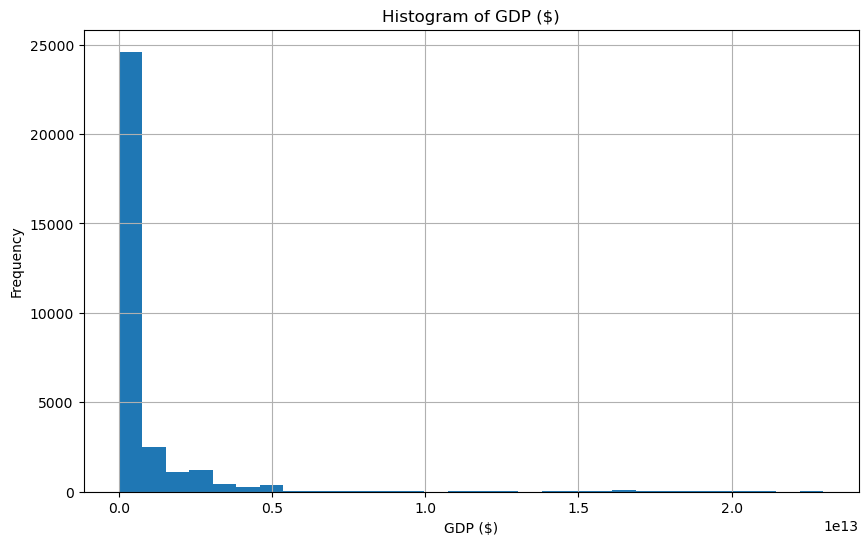

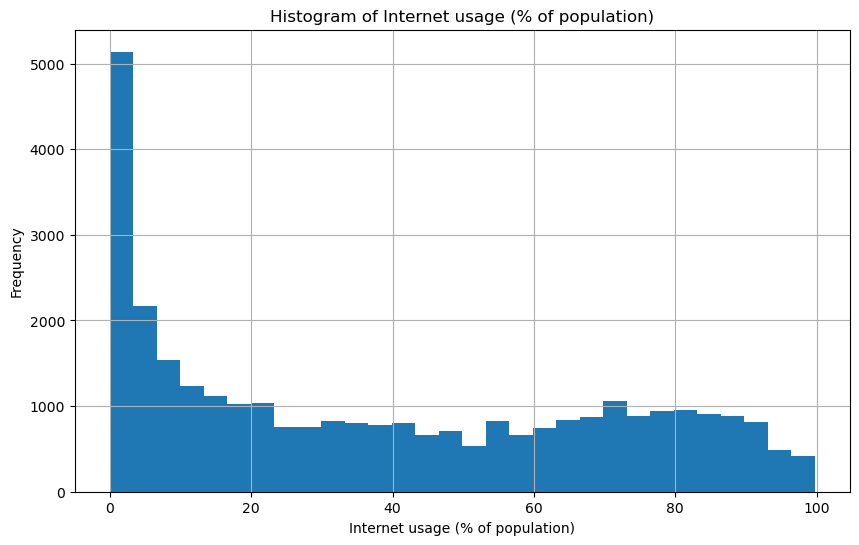

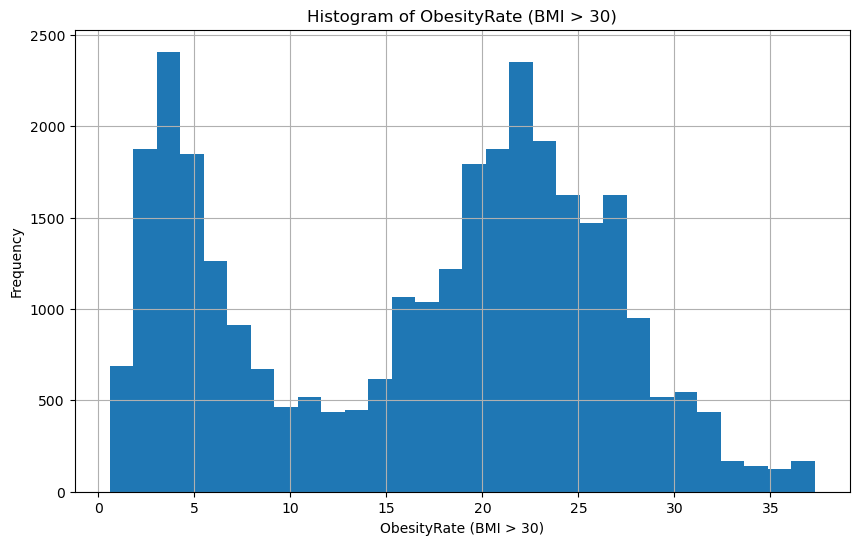

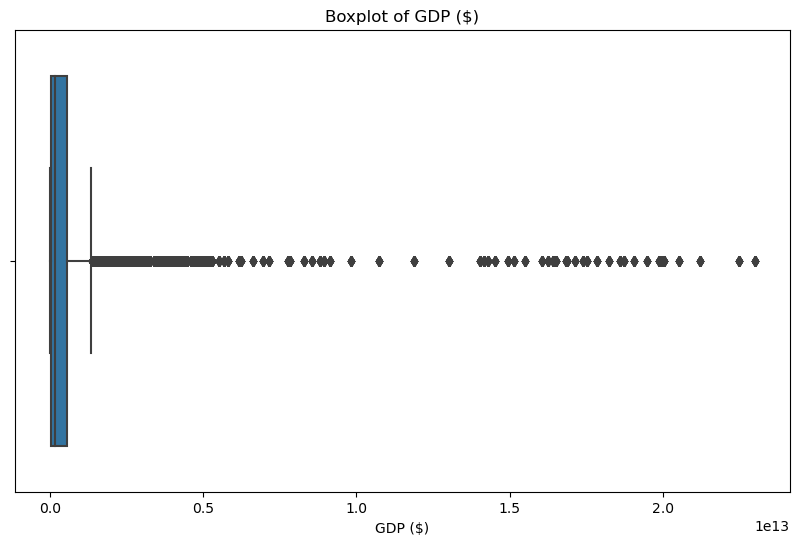

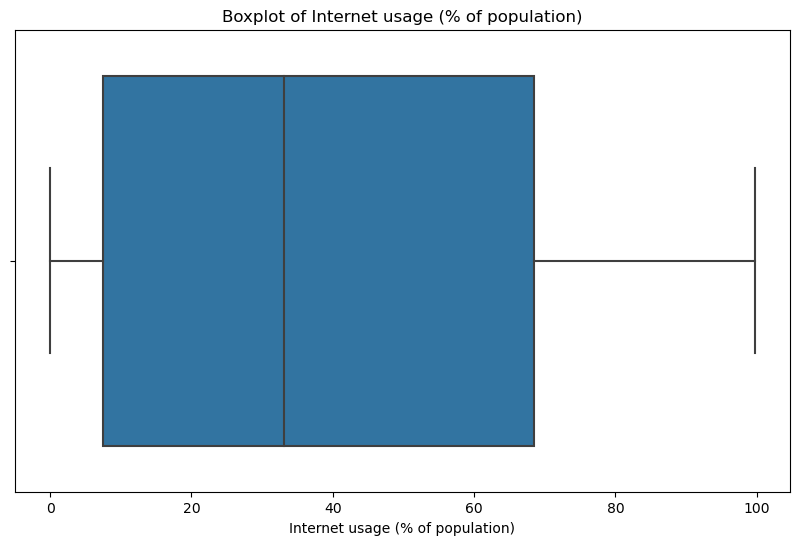

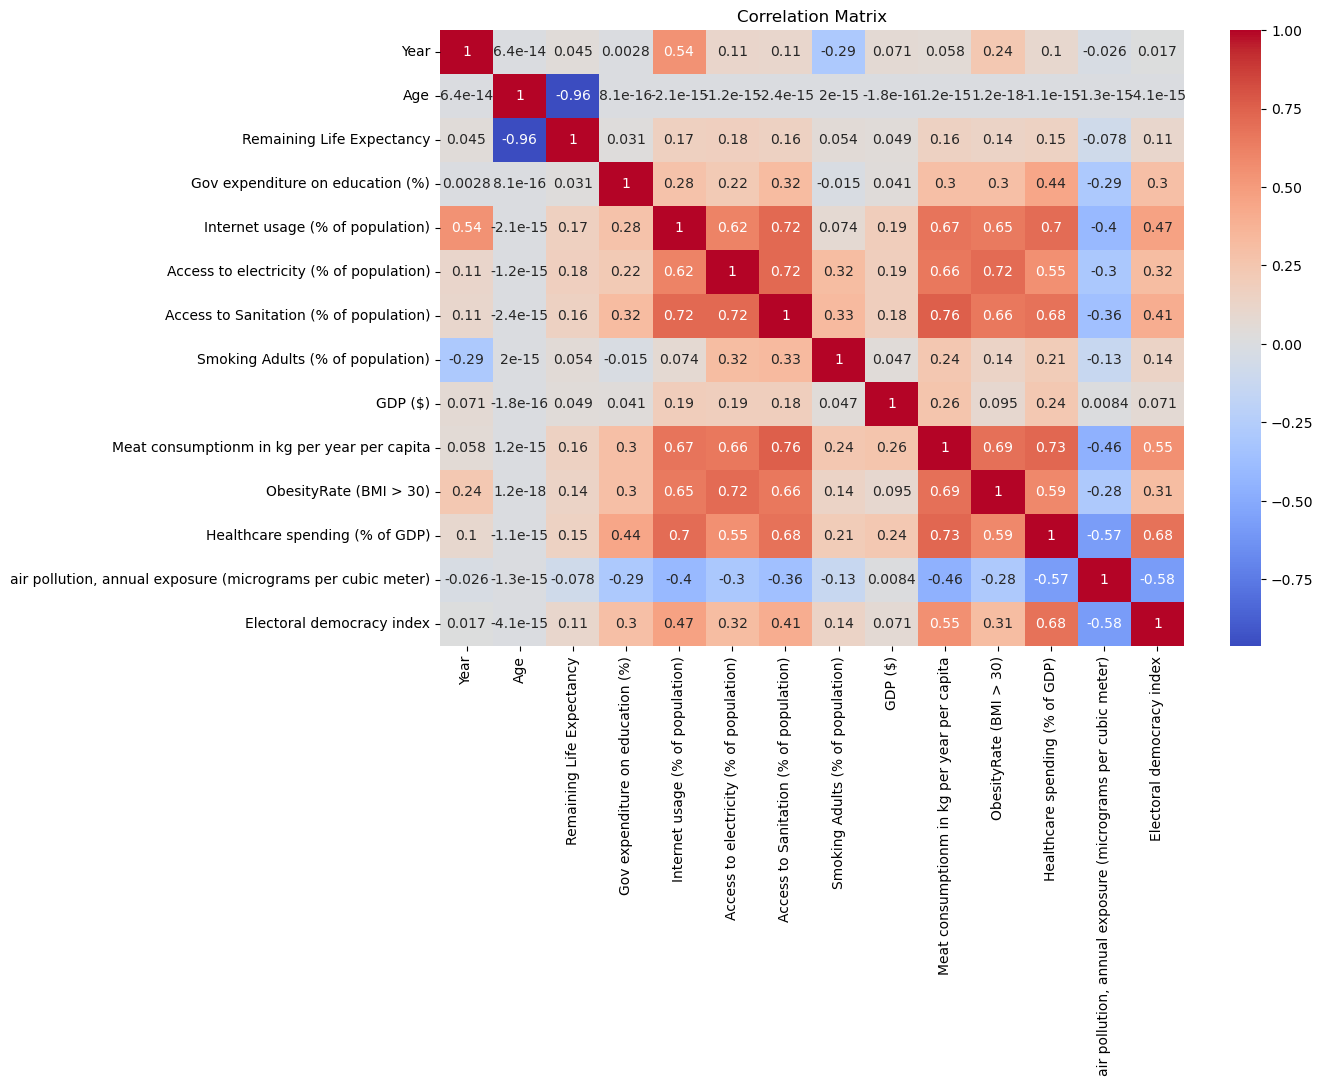

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Load the final merged dataset
final_df = pd.read_csv('final_merged_data.csv')
 
# Display basic descriptive statistics
print("Descriptive Statistics:")
print(final_df.describe())
 
# Histograms for selected columns
columns_to_visualize = ['GDP ($)', 'Internet usage (% of population)', 'ObesityRate (BMI > 30)']
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    final_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
 
# Boxplots for potential outlier detection in specific columns
columns_for_outliers = ['GDP ($)', 'Internet usage (% of population)']
for column in columns_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
 
# Correlation matrix (optional)
plt.figure(figsize=(12, 8))
# Update here: specify numeric_only=True
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection & Engineering (haris)

Korrelationen und welches sind wichtige features
binary encoding for categorial variables

In [71]:
# List of countries to be removed
countries_to_remove = [
    'United Arab Emirates', 'Cayman Islands', 'Suriname', 'Curacao', 'Turkmenistan',
    'South Sudan', 'Uzbekistan', 'Palestine', 'East Timor', 'Liberia', 'Vietnam', 'Nauru',
    'Serbia', 'American Samoa', 'Bahrain', 'Kosovo', 'Curacao', 'South Sudan', 'North Korea',
    'Liberia', 'South Sudan', 'Turks and Caicos Islands', 'Greenland', 'Channel Islands',
    'Montenegro', 'Djibouti', 'Somalia', 'Turks and Caicos Islands', 'Sint Maarten (Dutch part)',
    'Kosovo', 'Cayman Islands', 'Bahrain', 'Bhutan', 'Micronesia (country)', 'Nauru', 'Qatar',
    'South Sudan', 'Burundi', 'Sudan', 'Comoros', 'Democratic Republic of Congo', 'Libya',
    'Papua New Guinea', 'Seychelles', 'Syria', 'Montenegro', 'Serbia', 'South Sudan',
    'Montenegro', 'Zimbabwe'
]

# Remove rows with the specified countries
final_df = final_df[~final_df['Entity'].isin(countries_to_remove)]

final_df


Entity Code  Year     Sex  Age  Remaining Life Expectancy  \
0            Algeria  DZA  2000  Female    0                    71.9487   
1            Algeria  DZA  2001  Female    0                    72.1968   
2            Algeria  DZA  2002  Female    0                    72.5595   
3            Algeria  DZA  2003  Female    0                    72.2499   
4            Algeria  DZA  2004  Female    0                    72.8122   
...              ...  ...   ...     ...  ...                        ...   
31096  United States  USA  2016    Male   80                     8.7799   
31097  United States  USA  2017    Male   80                     8.7725   
31098  United States  USA  2018    Male   80                     8.8969   
31099  United States  USA  2019    Male   80                     9.0346   
31100  United States  USA  2020    Male   80                     8.2723   

       Gov expenditure on education (%)  Internet usage (% of population)  \
0                              4.982849                          0.491706   
1                              4.902120                          0.646114   
2                              4.821391                          1.591641   
3                              4.740663                          2.195360   
4                              4.659934                          4.634475   
...                                 ...                               ...   
31096                          4.806660                         85.544420   
31097                          5.122880                         87.274890   
31098                          4.928890                         88.498900   
31099                          4.987280                         89.430280   
31100                          5.435440                         90.900000   

       Access to electricity (% of population)  \
0                                     98.97310   
1                                     98.96687   
2                                     98.95306   
3                                     98.93401   
4                                     98.91208   
...                                        ...   
31096                                100.00000   
31097                                100.00000   
31098                                100.00000   
31099                                100.00000   
31100                                100.00000   

       Access to Sanitation (% of population)  \
0                                       58.85   
1                                       59.19   
2                                       59.53   
3                                       59.86   
4                                       60.18   
...                                       ...   
31096                                   97.19   
31097                                   97.16   
31098                                   97.14   
31099                                   97.11   
31100                                   97.09   

       Smoking Adults (% of population)       GDP ($)  \
0                             22.200000  2.703917e+11   
1                             22.120000  2.785034e+11   
2                             22.040000  2.940996e+11   
3                             21.960000  3.152748e+11   
4                             21.880000  3.288316e+11   
...                                 ...           ...   
31096                         24.666667  1.905248e+13   
31097                         24.033333  1.947962e+13   
31098                         23.400000  2.005337e+13   
31099                         23.400000  2.051348e+13   
31100                         23.000000  1.994571e+13   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
0                                        18.933718                    15.0   
1                                        17.341906                    15.5   
2                                        18.096855                    16.1   
3

In [72]:
#OneHotEncoding

# Ausgewählte Spalten für das binäre Encoding
#columns_to_encode = ['Sex', 'Entity']

# Erstelle ein neues DataFrame für das Training mit binärem Encoding
#training_dataset = pd.get_dummies(final_df, columns=columns_to_encode)

# Entferne die 'Code'-Spalte
#training_dataset = training_dataset.drop('Code', axis=1)

# Speichern des Ergebnisses
#training_dataset.to_csv('training_dataset.csv', index=False)


#training_dataset

In [73]:
import category_encoders as ce

import pandas as pd
 
# Assuming you have the original DataFrame before binary encoding

# ... (your original data loading and preprocessing code)
 
final_df2 = final_df.drop('Code', axis=1)
 
# Selected columns for binary encoding

columns_to_encode = ['Sex', 'Entity']
 
# Create a new DataFrame for training with binary encoding

encoder = ce.BinaryEncoder(cols=columns_to_encode, drop_invariant=True, return_df=True)

training_dataset = encoder.fit_transform(final_df2)
 
# Save the original column names before encoding

original_columns = encoder.get_feature_names_out()
 
 
# Save the result

training_dataset.to_csv('training_dataset_binary.csv', index=False)
 
# Back-encode to get the original DataFrame

original_df = encoder.inverse_transform(training_dataset[original_columns])
 
training_dataset

Entity_0  Entity_1  Entity_2  Entity_3  Entity_4  Entity_5  Entity_6  \
0             0         0         0         0         0         0         1   
1             0         0         0         0         0         0         1   
2             0         0         0         0         0         0         1   
3             0         0         0         0         0         0         1   
4             0         0         0         0         0         0         1   
...         ...       ...       ...       ...       ...       ...       ...   
31096         1         1         0         0         0         1         1   
31097         1         1         0         0         0         1         1   
31098         1         1         0         0         0         1         1   
31099         1         1         0         0         0         1         1   
31100         1         1         0         0         0         1         1   

       Year  Sex_0  Sex_1  ...  Internet usage (% of population)  \
0      2000      0      1  ...                          0.491706   
1      2001      0      1  ...                          0.646114   
2      2002      0      1  ...                          1.591641   
3      2003      0      1  ...                          2.195360   
4      2004      0      1  ...                          4.634475   
...     ...    ...    ...  ...                               ...   
31096  2016      1      0  ...                         85.544420   
31097  2017      1      0  ...                         87.274890   
31098  2018      1      0  ...                         88.498900   
31099  2019      1      0  ...                         89.430280   
31100  2020      1      0  ...                         90.900000   

       Access to electricity (% of population)  \
0                                     98.97310   
1                                     98.96687   
2                                     98.95306   
3                                     98.93401   
4                                     98.91208   
...                                        ...   
31096                                100.00000   
31097                                100.00000   
31098                                100.00000   
31099                                100.00000   
31100                                100.00000   

       Access to Sanitation (% of population)  \
0                                       58.85   
1                                       59.19   
2                                       59.53   
3                                       59.86   
4                                       60.18   
...                                       ...   
31096                                   97.19   
31097                                   97.16   
31098                                   97.14   
31099                                   97.11   
31100                                   97.09   

       Smoking Adults (% of population)       GDP ($)  \
0                             22.200000  2.703917e+11   
1                             22.120000  2.785034e+11   
2                             22.040000  2.940996e+11   
3                             21.960000  3.152748e+11   
4                             21.880000  3.288316e+11   
...                                 ...           ...   
31096                         24.666667  1.905248e+13   
31097                         24.033333  1.947962e+13   
31098                         23.400000  2.005337e+13   
31099                         23.400000  2.051348e+13   
31100                         23.000000  1.994571e+13   

       Meat consumptionm in kg per year per capita  ObesityRate (BMI > 30)  \
0                                        18.933718                    15.0   
1                                        17.341906                    15.5   
2                                        18.096855                    16.1   
3                                        19.324575    

### List the encodings

In [74]:
# Extract binary encoded 'Entity' columns
binary_encoded_entities = training_dataset.filter(regex='^Entity_')

# Retrieve the original 'Entity' values from the back-encoded DataFrame
original_entities = original_df['Entity']

# Create a DataFrame that pairs each original 'Entity' with its binary encoding
entity_binary_encoding = pd.concat([original_entities, binary_encoded_entities], axis=1).drop_duplicates()

# Convert the DataFrame to a list of tuples for easier reading
entity_binary_encoding_list = list(entity_binary_encoding.itertuples(index=False, name=None))

# Print the list to see the original 'Entity' and their binary encodings
for item in entity_binary_encoding_list:
    print(item)




('Algeria', 0, 0, 0, 0, 0, 0, 1)
('Argentina', 0, 0, 0, 0, 0, 1, 0)
('Armenia', 0, 0, 0, 0, 0, 1, 1)
('Australia', 0, 0, 0, 0, 1, 0, 0)
('Austria', 0, 0, 0, 0, 1, 0, 1)
('Azerbaijan', 0, 0, 0, 0, 1, 1, 0)
('Bangladesh', 0, 0, 0, 0, 1, 1, 1)
('Belarus', 0, 0, 0, 1, 0, 0, 0)
('Belgium', 0, 0, 0, 1, 0, 0, 1)
('Benin', 0, 0, 0, 1, 0, 1, 0)
('Brazil', 0, 0, 0, 1, 0, 1, 1)
('Bulgaria', 0, 0, 0, 1, 1, 0, 0)
('Burkina Faso', 0, 0, 0, 1, 1, 0, 1)
('Cambodia', 0, 0, 0, 1, 1, 1, 0)
('Canada', 0, 0, 0, 1, 1, 1, 1)
('Chad', 0, 0, 1, 0, 0, 0, 0)
('Chile', 0, 0, 1, 0, 0, 0, 1)
('China', 0, 0, 1, 0, 0, 1, 0)
('Colombia', 0, 0, 1, 0, 0, 1, 1)
('Costa Rica', 0, 0, 1, 0, 1, 0, 0)
("Cote d'Ivoire", 0, 0, 1, 0, 1, 0, 1)
('Croatia', 0, 0, 1, 0, 1, 1, 0)
('Cyprus', 0, 0, 1, 0, 1, 1, 1)
('Czechia', 0, 0, 1, 1, 0, 0, 0)
('Denmark', 0, 0, 1, 1, 0, 0, 1)
('Dominican Republic', 0, 0, 1, 1, 0, 1, 0)
('Ecuador', 0, 0, 1, 1, 0, 1, 1)
('Egypt', 0, 0, 1, 1, 1, 0, 0)
('Estonia', 0, 0, 1, 1, 1, 0, 1)
('Ethiopia', 0, 0, 

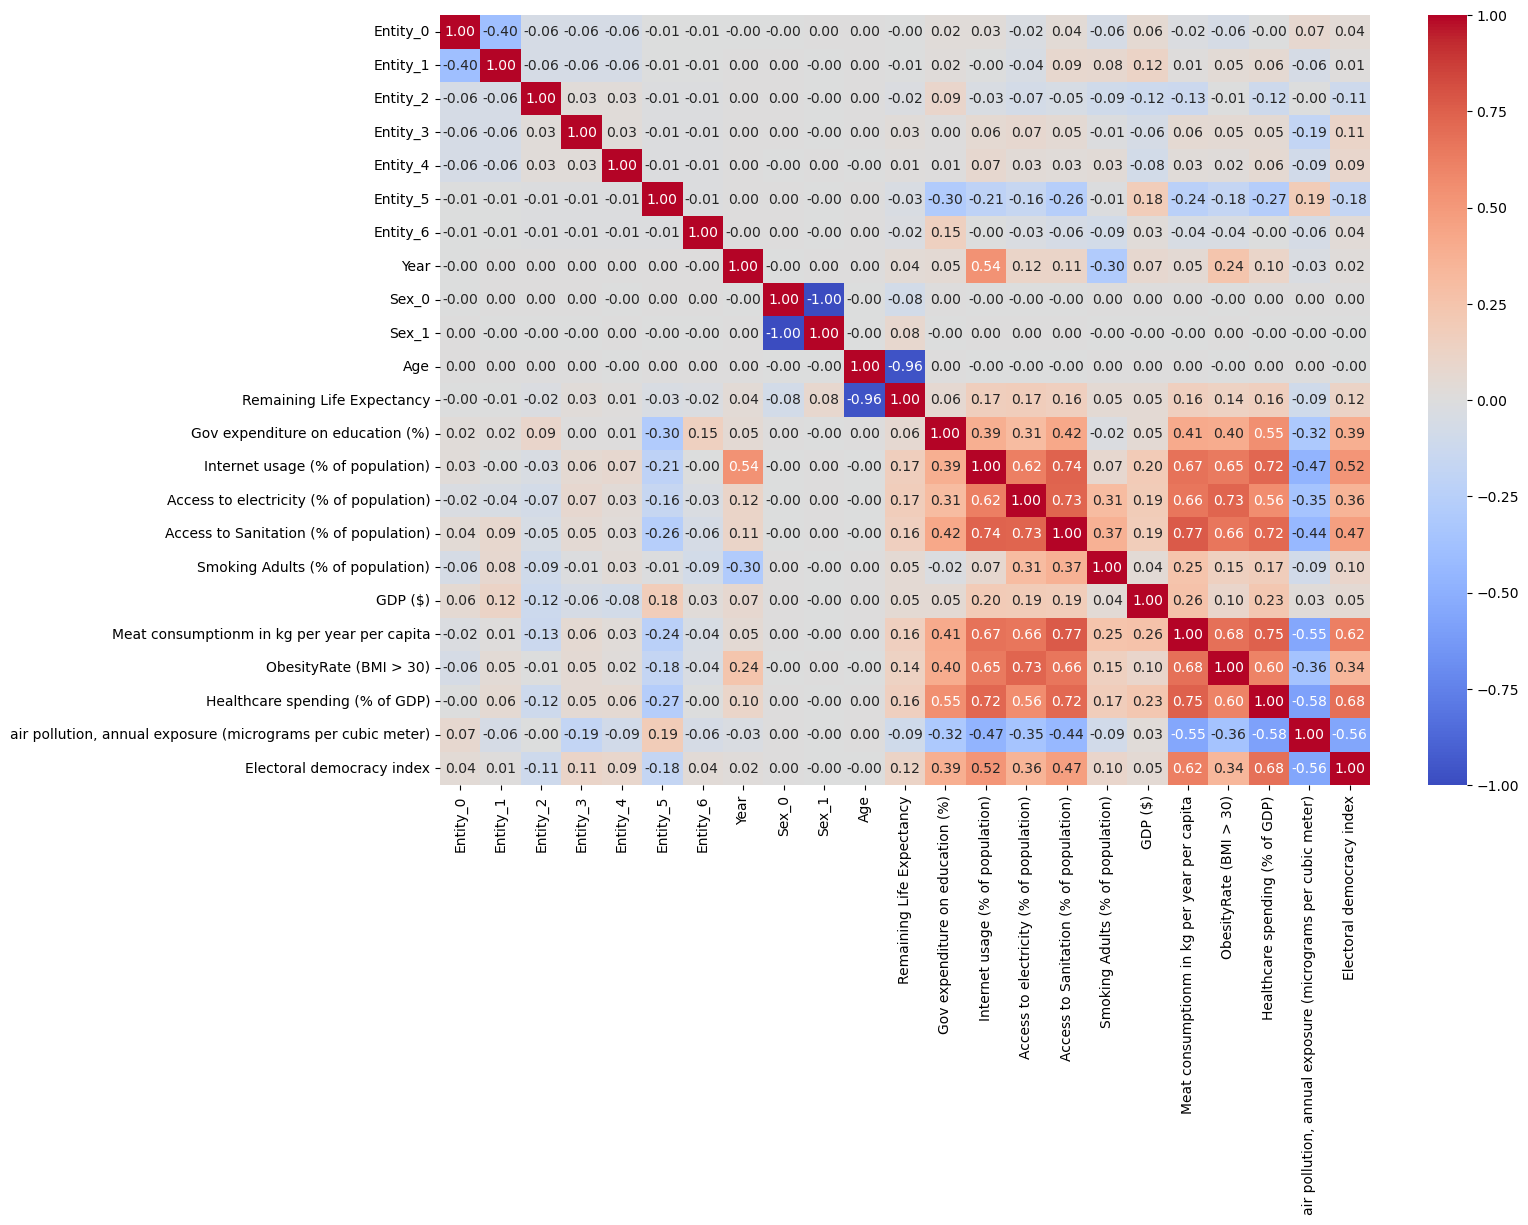

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'final_df'
correlation_matrix = training_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()
#    0 to 0.2: Very weak correlation
#    0.2 to 0.4: Weak correlation
#    0.4 to 0.6: Moderate correlation
#    0.6 to 0.8: Strong correlation
#    0.8 to 1.0: Very strong correlation

## train models (alle)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from joblib import dump

data = pd.read_csv('training_dataset_binary.csv')

#Remaining Life Expectancy target variable
X = data.drop('Remaining Life Expectancy', axis=1)
y = data['Remaining Life Expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance: RMSE = {rmse}")

# Save model
dump(model, 'frontend/linreg.joblib')

Model Performance: RMSE = 3.7843048534770007


['frontend/linreg.joblib']

## XAI (TBD)

## frontend (Sven)